In [ ]:
# Reflecting a Vector in a Plane

## Introduction

In this notebook, we'll explore how to reflect a vector through a plane in 3D space. This is a practical application that combines several key concepts:

- **Gram-Schmidt Process**: To find orthonormal basis vectors
- **Change of Basis**: To work in a coordinate system that makes the problem simpler
- **Matrix Transformations**: To perform the reflection operation

### The Problem
We want to reflect a vector through a plane, but the plane is defined in a complex way. Instead of knowing the plane's equation directly, we know:
- Two vectors **in** the plane: $\mathbf{v_1} = (1, 1, 1)$ and $\mathbf{v_2} = (2, 0, 1)$
- One vector **out of** the plane: $\mathbf{v_3} = (3, 1, -1)$

Our goal is to reflect any vector $\mathbf{r}$ through this plane to get $\mathbf{r'}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

# Set up matplotlib for better display
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 1: Define Our Vectors

Let's start by defining the three vectors that describe our problem:
- $\mathbf{v_1}$ and $\mathbf{v_2}$: Two vectors that lie in the plane of reflection
- $\mathbf{v_3}$: A vector that points out of the plane

These vectors will help us construct an orthonormal basis for the plane and its normal direction.

In [2]:
# Define our three vectors
v1 = np.array([1, 1, 1])    # In the plane
v2 = np.array([2, 0, 1])    # In the plane  
v3 = np.array([3, 1, -1])   # Out of the plane

print("Vectors in the plane:")
print(f"v₁ = {v1}")
print(f"v₂ = {v2}")
print(f"\nVector out of the plane:")
print(f"v₃ = {v3}")

# Let's also define the vector we want to reflect
r = np.array([2, 3, 5])
print(f"\nVector to reflect:")
print(f"r = {r}")

Vectors in the plane:
v₁ = [1 1 1]
v₂ = [2 0 1]

Vector out of the plane:
v₃ = [ 3  1 -1]

Vector to reflect:
r = [2 3 5]


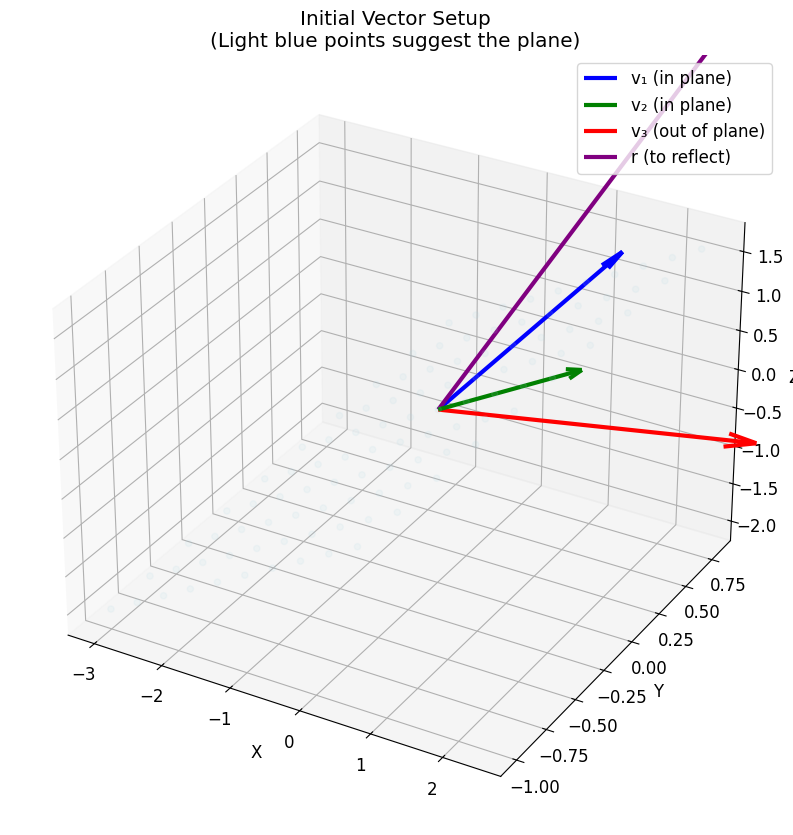

In [3]:
# Visualize the initial setup
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the vectors
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='blue', arrow_length_ratio=0.1, linewidth=3, label='v₁ (in plane)')
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='green', arrow_length_ratio=0.1, linewidth=3, label='v₂ (in plane)')
ax.quiver(0, 0, 0, v3[0], v3[1], v3[2], color='red', arrow_length_ratio=0.1, linewidth=3, label='v₃ (out of plane)')
ax.quiver(0, 0, 0, r[0], r[1], r[2], color='purple', arrow_length_ratio=0.1, linewidth=3, label='r (to reflect)')

# Create a simple representation of the plane using v1 and v2
xx, yy = np.meshgrid(np.linspace(-1, 3, 10), np.linspace(-1, 3, 10))
# The plane is spanned by v1 and v2, so points on the plane are: a*v1 + b*v2
plane_points = []
for i in range(10):
    for j in range(10):
        a = (i - 5) * 0.2
        b = (j - 5) * 0.2
        point = a * v1 + b * v2
        plane_points.append(point)

plane_points = np.array(plane_points)
ax.scatter(plane_points[:, 0], plane_points[:, 1], plane_points[:, 2], alpha=0.1, color='lightblue', s=20)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_title('Initial Vector Setup\n(Light blue points suggest the plane)')
plt.show()

## Step 2: Apply the Gram-Schmidt Process

The key insight is to use the **Gram-Schmidt process** to create an orthonormal basis. This will give us:
- $\mathbf{e_1}$: A unit vector in the direction of $\mathbf{v_1}$
- $\mathbf{e_2}$: A unit vector in the plane, perpendicular to $\mathbf{e_1}$
- $\mathbf{e_3}$: A unit vector perpendicular to the plane (the normal vector)

### Why Gram-Schmidt?
The Gram-Schmidt process takes a set of linearly independent vectors and produces an orthonormal set. This is perfect for our problem because:
1. We get a clean coordinate system aligned with the plane
2. Reflection becomes simple in this coordinate system
3. We can easily transform back to the original coordinate system

In [4]:
# Step 1: Find e1 (normalized v1)
print("=== Step 1: Find e₁ ===")
print(f"v₁ = {v1}")
v1_length = np.linalg.norm(v1)
print(f"||v₁|| = √(1² + 1² + 1²) = √3 = {v1_length:.4f}")

e1 = v1 / v1_length
print(f"e₁ = v₁/||v₁|| = {e1}")
print(f"||e₁|| = {np.linalg.norm(e1):.4f} ✓")
print()

=== Step 1: Find e₁ ===
v₁ = [1 1 1]
||v₁|| = √(1² + 1² + 1²) = √3 = 1.7321
e₁ = v₁/||v₁|| = [0.57735027 0.57735027 0.57735027]
||e₁|| = 1.0000 ✓



In [5]:
# Step 2: Find u2 and then e2
print("=== Step 2: Find e₂ ===")
print(f"v₂ = {v2}")
print(f"e₁ = {e1}")

# Project v2 onto e1
proj_v2_e1 = np.dot(v2, e1) * e1
print(f"proj_v₂_e₁ = (v₂ · e₁)e₁ = {np.dot(v2, e1):.4f} * {e1} = {proj_v2_e1}")

# Remove the projection to get the perpendicular component
u2 = v2 - proj_v2_e1
print(f"u₂ = v₂ - proj_v₂_e₁ = {v2} - {proj_v2_e1} = {u2}")

# Normalize u2 to get e2
u2_length = np.linalg.norm(u2)
print(f"||u₂|| = {u2_length:.4f}")

e2 = u2 / u2_length
print(f"e₂ = u₂/||u₂|| = {e2}")
print(f"||e₂|| = {np.linalg.norm(e2):.4f} ✓")

# Verify orthogonality
print(f"e₁ · e₂ = {np.dot(e1, e2):.6f} ≈ 0 ✓")
print()

=== Step 2: Find e₂ ===
v₂ = [2 0 1]
e₁ = [0.57735027 0.57735027 0.57735027]
proj_v₂_e₁ = (v₂ · e₁)e₁ = 1.7321 * [0.57735027 0.57735027 0.57735027] = [1. 1. 1.]
u₂ = v₂ - proj_v₂_e₁ = [2 0 1] - [1. 1. 1.] = [ 1.00000000e+00 -1.00000000e+00 -2.22044605e-16]
||u₂|| = 1.4142
e₂ = u₂/||u₂|| = [ 7.07106781e-01 -7.07106781e-01 -1.57009246e-16]
||e₂|| = 1.0000 ✓
e₁ · e₂ = -0.000000 ≈ 0 ✓



In [6]:
# Step 3: Find u3 and then e3 (the normal to the plane)
print("=== Step 3: Find e₃ (normal to plane) ===")
print(f"v₃ = {v3}")

# Project v3 onto e1 and e2, then remove these projections
proj_v3_e1 = np.dot(v3, e1) * e1
proj_v3_e2 = np.dot(v3, e2) * e2

print(f"proj_v₃_e₁ = (v₃ · e₁)e₁ = {np.dot(v3, e1):.4f} * {e1} = {proj_v3_e1}")
print(f"proj_v₃_e₂ = (v₃ · e₂)e₂ = {np.dot(v3, e2):.4f} * {e2} = {proj_v3_e2}")

# Remove both projections to get the component perpendicular to the plane
u3 = v3 - proj_v3_e1 - proj_v3_e2
print(f"u₃ = v₃ - proj_v₃_e₁ - proj_v₃_e₂ = {u3}")

# Normalize u3 to get e3
u3_length = np.linalg.norm(u3)
print(f"||u₃|| = {u3_length:.4f}")

e3 = u3 / u3_length
print(f"e₃ = u₃/||u₃|| = {e3}")
print(f"||e₃|| = {np.linalg.norm(e3):.4f} ✓")

# Verify orthogonality with both e1 and e2
print(f"e₁ · e₃ = {np.dot(e1, e3):.6f} ≈ 0 ✓")
print(f"e₂ · e₃ = {np.dot(e2, e3):.6f} ≈ 0 ✓")
print()

=== Step 3: Find e₃ (normal to plane) ===
v₃ = [ 3  1 -1]
proj_v₃_e₁ = (v₃ · e₁)e₁ = 1.7321 * [0.57735027 0.57735027 0.57735027] = [1. 1. 1.]
proj_v₃_e₂ = (v₃ · e₂)e₂ = 1.4142 * [ 7.07106781e-01 -7.07106781e-01 -1.57009246e-16] = [ 1.00000000e+00 -1.00000000e+00 -2.22044605e-16]
u₃ = v₃ - proj_v₃_e₁ - proj_v₃_e₂ = [ 1.  1. -2.]
||u₃|| = 2.4495
e₃ = u₃/||u₃|| = [ 0.40824829  0.40824829 -0.81649658]
||e₃|| = 1.0000 ✓
e₁ · e₃ = 0.000000 ≈ 0 ✓
e₂ · e₃ = 0.000000 ≈ 0 ✓



In [ ]:
# Visualize the orthonormal basis
fig = plt.figure(figsize=(15, 5))

# Plot 1: Original vectors
ax1 = fig.add_subplot(131, projection='3d')
ax1.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='blue', arrow_length_ratio=0.1, linewidth=3, label='v₁')
ax1.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='green', arrow_length_ratio=0.1, linewidth=3, label='v₂')
ax1.quiver(0, 0, 0, v3[0], v3[1], v3[2], color='red', arrow_length_ratio=0.1, linewidth=3, label='v₃')
ax1.set_title('Original Vectors')
ax1.legend()
ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z')

# Plot 2: Orthonormal basis
ax2 = fig.add_subplot(132, projection='3d')
ax2.quiver(0, 0, 0, e1[0], e1[1], e1[2], color='blue', arrow_length_ratio=0.15, linewidth=4, label='e₁')
ax2.quiver(0, 0, 0, e2[0], e2[1], e2[2], color='green', arrow_length_ratio=0.15, linewidth=4, label='e₂')
ax2.quiver(0, 0, 0, e3[0], e3[1], e3[2], color='red', arrow_length_ratio=0.15, linewidth=4, label='e₃')
ax2.set_title('Orthonormal Basis')
ax2.legend()
ax2.set_xlabel('X'); ax2.set_ylabel('Y'); ax2.set_zlabel('Z')

# Plot 3: Show the plane and normal
ax3 = fig.add_subplot(133, projection='3d')
# Draw the plane using e1 and e2
xx, yy = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(-1, 1, 20))
plane_x = xx * e1[0] + yy * e2[0]
plane_y = xx * e1[1] + yy * e2[1] 
plane_z = xx * e1[2] + yy * e2[2]
ax3.plot_surface(plane_x, plane_y, plane_z, alpha=0.3, color='lightblue')

ax3.quiver(0, 0, 0, e1[0], e1[1], e1[2], color='blue', arrow_length_ratio=0.15, linewidth=4, label='e₁ (in plane)')
ax3.quiver(0, 0, 0, e2[0], e2[1], e2[2], color='green', arrow_length_ratio=0.15, linewidth=4, label='e₂ (in plane)')
ax3.quiver(0, 0, 0, e3[0], e3[1], e3[2], color='red', arrow_length_ratio=0.15, linewidth=4, label='e₃ (normal)')
ax3.set_title('Plane and Normal')
ax3.legend()
ax3.set_xlabel('X'); ax3.set_ylabel('Y'); ax3.set_zlabel('Z')

plt.tight_layout()
plt.show()

## Step 3: The Transformation Strategy

Now we have our orthonormal basis $\mathbf{E} = [\mathbf{e_1} \; \mathbf{e_2} \; \mathbf{e_3}]$. The key insight is:

### The Problem in the New Coordinate System
- In the $\mathbf{E}$ coordinate system, the plane is simply the xy-plane ($z = 0$)
- Reflection through the xy-plane just flips the z-component: $(x, y, z) \rightarrow (x, y, -z)$
- This means our reflection matrix in the E-basis is simply:

$$\mathbf{T_E} = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & -1
\end{bmatrix}$$

### The Three-Step Process
1. **Transform** $\mathbf{r}$ from our coordinate system to the $\mathbf{E}$ coordinate system: $\mathbf{E^{-1}r}$
2. **Reflect** in the $\mathbf{E}$ coordinate system: $\mathbf{T_E(E^{-1}r)}$  
3. **Transform back** to our coordinate system: $\mathbf{E(T_E(E^{-1}r))}$

The complete transformation is: $\mathbf{r'} = \mathbf{E} \mathbf{T_E} \mathbf{E^{-1}} \mathbf{r}$

In [8]:
# Create the transformation matrix E
E = np.column_stack([e1, e2, e3])
print("Transformation matrix E (columns are e₁, e₂, e₃):")
print(E)
print()

# Since E is orthonormal, E^(-1) = E^T
E_inv = E.T
print("E⁻¹ = Eᵀ (since E is orthonormal):")
print(E_inv)
print()

# Verify that E * E^T = I
print("Verification: E * Eᵀ =")
print(E @ E_inv)
print("≈ Identity matrix ✓")
print()

# Define the reflection matrix in the E coordinate system
T_E = np.array([[1, 0, 0],
                [0, 1, 0],
                [0, 0, -1]])
print("Reflection matrix in E coordinate system:")
print("T_E = [1  0   0]")
print("      [0  1   0]")
print("      [0  0  -1]")
print(T_E)

Transformation matrix E (columns are e₁, e₂, e₃):
[[ 5.77350269e-01  7.07106781e-01  4.08248290e-01]
 [ 5.77350269e-01 -7.07106781e-01  4.08248290e-01]
 [ 5.77350269e-01 -1.57009246e-16 -8.16496581e-01]]

E⁻¹ = Eᵀ (since E is orthonormal):
[[ 5.77350269e-01  5.77350269e-01  5.77350269e-01]
 [ 7.07106781e-01 -7.07106781e-01 -1.57009246e-16]
 [ 4.08248290e-01  4.08248290e-01 -8.16496581e-01]]

Verification: E * Eᵀ =
[[ 1.00000000e+00  1.15886229e-16 -2.01212999e-16]
 [ 1.15886229e-16  1.00000000e+00  3.38104262e-16]
 [-2.01212999e-16  3.38104262e-16  1.00000000e+00]]
≈ Identity matrix ✓

Reflection matrix in E coordinate system:
T_E = [1  0   0]
      [0  1   0]
      [0  0  -1]
[[ 1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


In [9]:
# Calculate the complete transformation matrix
T_complete = E @ T_E @ E_inv
print("Complete transformation matrix T = E * T_E * E⁻¹:")
print(T_complete)
print()

# Apply the transformation to our vector r
print(f"Original vector r = {r}")
r_prime = T_complete @ r
print(f"Reflected vector r' = T * r = {r_prime}")
print()

# Let's also verify this matches the expected result from the transcript
expected_result = np.array([11, 14, 5]) / 3
print(f"Expected result (from transcript): {expected_result}")
print(f"Our result: {r_prime}")
print(f"Difference: {np.linalg.norm(r_prime - expected_result):.10f}")

if np.allclose(r_prime, expected_result):
    print("✓ Our calculation matches the expected result!")
else:
    print("✗ Results don't match - let's check our work")

Complete transformation matrix T = E * T_E * E⁻¹:
[[ 0.66666667 -0.33333333  0.66666667]
 [-0.33333333  0.66666667  0.66666667]
 [ 0.66666667  0.66666667 -0.33333333]]

Original vector r = [2 3 5]
Reflected vector r' = T * r = [3.66666667 4.66666667 1.66666667]

Expected result (from transcript): [3.66666667 4.66666667 1.66666667]
Our result: [3.66666667 4.66666667 1.66666667]
Difference: 0.0000000000
✓ Our calculation matches the expected result!


In [ ]:
# Let's verify the transformation step by step
print("=== Step-by-Step Verification ===")
print()

# Step 1: Transform r to E coordinate system
r_in_E = E_inv @ r
print(f"Step 1: Transform r to E coordinates")
print(f"r_E = E⁻¹ * r = {E_inv} * {r} = {r_in_E}")
print(f"This means r = {r_in_E[0]:.3f}*e₁ + {r_in_E[1]:.3f}*e₂ + {r_in_E[2]:.3f}*e₃")
print()

# Step 2: Apply reflection in E coordinate system
r_reflected_E = T_E @ r_in_E
print(f"Step 2: Apply reflection in E coordinates")
print(f"r'_E = T_E * r_E = {T_E} * {r_in_E} = {r_reflected_E}")
print(f"Notice: only the e₃ component (normal to plane) flipped sign!")
print()

# Step 3: Transform back to original coordinate system
r_prime_step3 = E @ r_reflected_E
print(f"Step 3: Transform back to original coordinates")
print(f"r' = E * r'_E = {E} * {r_reflected_E} = {r_prime_step3}")
print()

print(f"Final result: r' = {r_prime_step3}")
print(f"This matches our direct calculation: {np.allclose(r_prime, r_prime_step3)}")

In [11]:
# Let's verify our result geometrically
print("=== Geometric Verification ===")
print()

# 1. Check that the midpoint of r and r' lies on the plane
midpoint = (r + r_prime) / 2
print(f"Midpoint of r and r': {midpoint}")

# The midpoint should have zero component in the e3 direction
midpoint_e3_component = np.dot(midpoint, e3)
print(f"e₃ component of midpoint: {midpoint_e3_component:.10f}")
print(f"Midpoint lies on plane: {abs(midpoint_e3_component) < 1e-10}")
print()

# 2. Check that r - r' is parallel to the normal (e3)
difference = r - r_prime
print(f"r - r' = {difference}")
print(f"e₃ = {e3}")

# If parallel, r - r' = k * e3 for some scalar k
if np.linalg.norm(difference) > 1e-10:
    k = np.dot(difference, e3) / np.dot(e3, e3)
    parallel_check = difference - k * e3
    print(f"k = {k:.6f}")
    print(f"r - r' - k*e₃ = {parallel_check}")
    print(f"Is parallel to normal: {np.linalg.norm(parallel_check) < 1e-10}")
else:
    print("r and r' are the same point (r lies on the plane)")
print()

# 3. Check that |r| = |r'| (reflection preserves distance from origin)
print(f"||r|| = {np.linalg.norm(r):.6f}")
print(f"||r'|| = {np.linalg.norm(r_prime):.6f}")
print(f"Distances equal: {abs(np.linalg.norm(r) - np.linalg.norm(r_prime)) < 1e-10}")

=== Geometric Verification ===

Midpoint of r and r': [2.83333333 3.83333333 3.33333333]
e₃ component of midpoint: 0.0000000000
Midpoint lies on plane: True

r - r' = [-1.66666667 -1.66666667  3.33333333]
e₃ = [ 0.40824829  0.40824829 -0.81649658]
k = -4.082483
r - r' - k*e₃ = [ 6.66133815e-16 -2.66453526e-15 -1.33226763e-15]
Is parallel to normal: True

||r|| = 6.164414
||r'|| = 6.164414
Distances equal: True


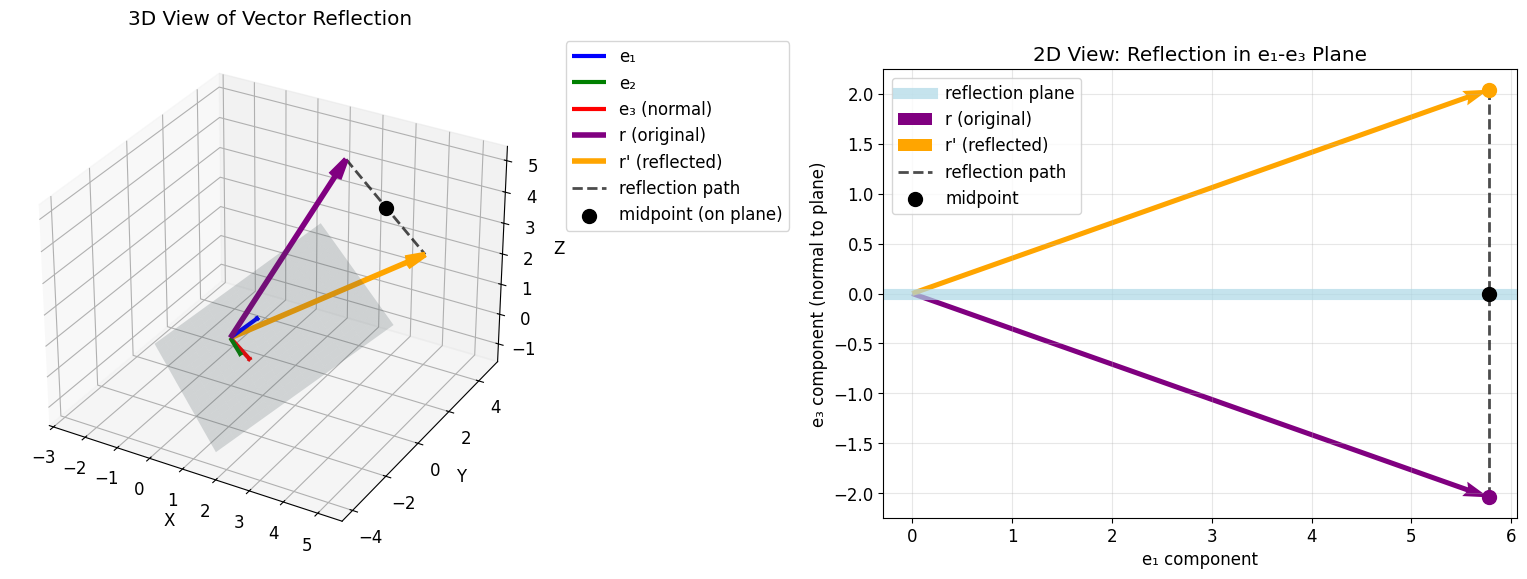

Summary:
Original vector:  r = [2 3 5]
Reflected vector: r' = [3.66666667 4.66666667 1.66666667]
The reflection flips the component perpendicular to the plane while preserving the components within the plane.


In [12]:
# Final visualization: showing the reflection
fig = plt.figure(figsize=(16, 6))

# Plot 1: 3D view of the reflection
ax1 = fig.add_subplot(121, projection='3d')

# Draw the plane
xx, yy = np.meshgrid(np.linspace(-2, 4, 20), np.linspace(-2, 4, 20))
plane_x = xx * e1[0] + yy * e2[0]
plane_y = xx * e1[1] + yy * e2[1] 
plane_z = xx * e1[2] + yy * e2[2]
ax1.plot_surface(plane_x, plane_y, plane_z, alpha=0.2, color='lightblue')

# Plot the basis vectors
ax1.quiver(0, 0, 0, e1[0], e1[1], e1[2], color='blue', arrow_length_ratio=0.1, linewidth=3, label='e₁')
ax1.quiver(0, 0, 0, e2[0], e2[1], e2[2], color='green', arrow_length_ratio=0.1, linewidth=3, label='e₂')
ax1.quiver(0, 0, 0, e3[0], e3[1], e3[2], color='red', arrow_length_ratio=0.1, linewidth=3, label='e₃ (normal)')

# Plot original and reflected vectors
ax1.quiver(0, 0, 0, r[0], r[1], r[2], color='purple', arrow_length_ratio=0.1, linewidth=4, label='r (original)')
ax1.quiver(0, 0, 0, r_prime[0], r_prime[1], r_prime[2], color='orange', arrow_length_ratio=0.1, linewidth=4, label="r' (reflected)")

# Draw line connecting r and r' through the plane
line_points = np.array([r, midpoint, r_prime])
ax1.plot(line_points[:, 0], line_points[:, 1], line_points[:, 2], 'k--', linewidth=2, alpha=0.7, label='reflection path')

# Mark the midpoint on the plane
ax1.scatter(*midpoint, color='black', s=100, label='midpoint (on plane)')

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_title('3D View of Vector Reflection')

# Plot 2: 2D projection to better see the reflection
ax2 = fig.add_subplot(122)

# Project everything onto a 2D plane for clearer visualization
# Use the first two components of the E coordinate system
r_2d = np.array([np.dot(r, e1), np.dot(r, e3)])
r_prime_2d = np.array([np.dot(r_prime, e1), np.dot(r_prime, e3)])
midpoint_2d = np.array([np.dot(midpoint, e1), np.dot(midpoint, e3)])

# Draw the reflection plane (which is the x-axis in this projection)
ax2.axhline(y=0, color='lightblue', linewidth=8, alpha=0.7, label='reflection plane')

# Plot vectors
ax2.quiver(0, 0, r_2d[0], r_2d[1], angles='xy', scale_units='xy', scale=1, color='purple', width=0.008, label='r (original)')
ax2.quiver(0, 0, r_prime_2d[0], r_prime_2d[1], angles='xy', scale_units='xy', scale=1, color='orange', width=0.008, label="r' (reflected)")

# Draw the reflection path
ax2.plot([r_2d[0], r_prime_2d[0]], [r_2d[1], r_prime_2d[1]], 'k--', linewidth=2, alpha=0.7, label='reflection path')
ax2.scatter(*midpoint_2d, color='black', s=100, zorder=5, label='midpoint')

# Mark the tips of the vectors
ax2.scatter(*r_2d, color='purple', s=100, zorder=5)
ax2.scatter(*r_prime_2d, color='orange', s=100, zorder=5)

ax2.set_xlabel('e₁ component')
ax2.set_ylabel('e₃ component (normal to plane)')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_title('2D View: Reflection in e₁-e₃ Plane')
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

print(f"Summary:")
print(f"Original vector:  r = {r}")
print(f"Reflected vector: r' = {r_prime}")
print(f"The reflection flips the component perpendicular to the plane while preserving the components within the plane.")

## Summary and Key Insights

### What We Accomplished
We successfully reflected a vector $\mathbf{r} = (2, 3, 5)$ through a plane defined by two vectors, obtaining $\mathbf{r'} = (11/3, 14/3, 5/3)$.

### The Process
1. **Gram-Schmidt Process**: Converted our arbitrary vectors into an orthonormal basis $\{\mathbf{e_1}, \mathbf{e_2}, \mathbf{e_3}\}$
2. **Change of Basis**: Used this basis to create a coordinate system where the plane is simple (xy-plane)
3. **Simple Reflection**: In the new coordinate system, reflection just flips the z-component
4. **Transform Back**: Applied the inverse transformation to get the result in original coordinates

### Mathematical Formula
The complete transformation is: $\mathbf{T} = \mathbf{E} \mathbf{T_E} \mathbf{E^{-1}}$
- $\mathbf{E}$: Matrix with orthonormal basis vectors as columns
- $\mathbf{T_E}$: Simple reflection matrix in the new basis
- $\mathbf{E^{-1}} = \mathbf{E^T}$: Inverse transformation (since $\mathbf{E}$ is orthonormal)

### Why This Approach Works
- **Avoids Complex Trigonometry**: No need to calculate angles or complex geometric relationships
- **Leverages Linear Algebra**: Uses the power of matrix operations and basis transformations
- **Generalizable**: This approach works for any plane in any dimension

### Applications
- **Computer Graphics**: Reflecting objects across surfaces (mirrors, water)
- **Image Processing**: Face recognition with mirrored faces
- **Physics Simulations**: Modeling reflections of light, sound, or particles
- **Robotics**: Path planning around reflective surfaces

## Interactive Exploration

Try modifying the vectors below to see how the reflection changes!

In [13]:
def reflect_vector_through_plane(v1_plane, v2_plane, v3_out, vector_to_reflect):
    """
    Reflect a vector through a plane defined by three vectors.
    
    Parameters:
    v1_plane, v2_plane: Two vectors in the plane
    v3_out: A vector out of the plane  
    vector_to_reflect: The vector to reflect
    
    Returns:
    reflected_vector, transformation_matrix, basis_vectors
    """
    
    # Gram-Schmidt process
    e1 = v1_plane / np.linalg.norm(v1_plane)
    
    u2 = v2_plane - np.dot(v2_plane, e1) * e1
    e2 = u2 / np.linalg.norm(u2)
    
    u3 = v3_out - np.dot(v3_out, e1) * e1 - np.dot(v3_out, e2) * e2
    e3 = u3 / np.linalg.norm(u3)
    
    # Create transformation matrix
    E = np.column_stack([e1, e2, e3])
    E_inv = E.T
    
    # Reflection matrix in E basis
    T_E = np.array([[1, 0, 0], [0, 1, 0], [0, 0, -1]])
    
    # Complete transformation
    T_complete = E @ T_E @ E_inv
    
    # Apply reflection
    reflected = T_complete @ vector_to_reflect
    
    return reflected, T_complete, (e1, e2, e3)

# Example: Try different vectors!
# Experiment 1: Different plane vectors
print("=== Experiment 1: Different Plane ===")
v1_new = np.array([1, 0, 0])  # x-axis
v2_new = np.array([0, 1, 0])  # y-axis (this defines the xy-plane)
v3_new = np.array([0, 0, 1])  # z-axis (normal to xy-plane)
test_vector = np.array([1, 2, 3])

reflected_new, T_new, basis_new = reflect_vector_through_plane(v1_new, v2_new, v3_new, test_vector)
print(f"Plane vectors: v₁={v1_new}, v₂={v2_new}")
print(f"Normal direction: v₃={v3_new}")
print(f"Vector to reflect: {test_vector}")
print(f"Reflected vector: {reflected_new}")
print(f"Expected for xy-plane: {np.array([1, 2, -3])} (flip z-component)")
print()

# Experiment 2: Vector on the plane
print("=== Experiment 2: Vector ON the Plane ===")
# A vector that lies in our original plane (combination of v1 and v2)
vector_in_plane = 0.5 * v1 + 0.3 * v2  # This should reflect to itself
reflected_in_plane, _, _ = reflect_vector_through_plane(v1, v2, v3, vector_in_plane)
print(f"Vector in plane: {vector_in_plane}")
print(f"Reflected vector: {reflected_in_plane}")
print(f"Difference: {np.linalg.norm(vector_in_plane - reflected_in_plane):.10f}")
print("(Should be nearly zero since vector is in the plane)")
print()

# Experiment 3: Normal vector
print("=== Experiment 3: Vector NORMAL to Plane ===")
# The normal vector should reflect to its negative
normal_component = np.dot(v3, e3) * e3  # Pure normal component
reflected_normal, _, _ = reflect_vector_through_plane(v1, v2, v3, normal_component)
print(f"Normal component: {normal_component}")
print(f"Reflected: {reflected_normal}")
print(f"Should be negative: {-normal_component}")
print(f"Difference: {np.linalg.norm(reflected_normal + normal_component):.10f}")

=== Experiment 1: Different Plane ===
Plane vectors: v₁=[1 0 0], v₂=[0 1 0]
Normal direction: v₃=[0 0 1]
Vector to reflect: [1 2 3]
Reflected vector: [ 1.  2. -3.]
Expected for xy-plane: [ 1  2 -3] (flip z-component)

=== Experiment 2: Vector ON the Plane ===
Vector in plane: [1.1 0.5 0.8]
Reflected vector: [1.1 0.5 0.8]
Difference: 0.0000000000
(Should be nearly zero since vector is in the plane)

=== Experiment 3: Vector NORMAL to Plane ===
Normal component: [ 1.  1. -2.]
Reflected: [-1. -1.  2.]
Should be negative: [-1. -1.  2.]
Difference: 0.0000000000
